<a href="https://colab.research.google.com/github/artbrgn/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/Copy_of_LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [26]:
# TODO - code!
def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk):
  a = prob_drunk_prior
  b = prob_positive
  c = prob_positive_drunk

  drunk = (a*c)/(b)
  print(drunk)

prob_drunk_given_positive(1, .08, .001)

0.0125


In [27]:
from scipy import stats
data = [1, .08, .001]
mean, var, std = stats.bayes_mvs(data)

mean

Mean(statistic=0.36033333333333334, minmax=(-0.5759464831413774, 1.2966131498080435))

In [28]:
var

Variance(statistic=inf, minmax=(0.10295991269186905, 6.013268147740479))

In [29]:
std

Std_dev(statistic=0.9843748702962641, minmax=(0.3208736709234166, 2.4521965964702908))

In [0]:
n_samples = 100000
data = stats.norm.rvs(size=n_samples)
res_mean, res_var, res_std = stats.bayes_mvs(data, alpha=.95)

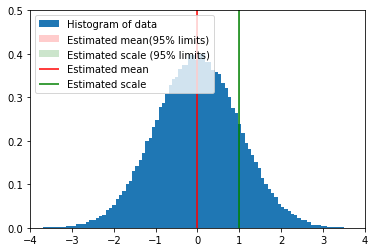

In [33]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(data, bins=100, density=True, label='Histogram of data')
ax.vlines(res_mean.statistic, 0, 0.5, colors='r', label='Estimated mean')
ax.axvspan(res_mean.minmax[0], res_mean.minmax[1], facecolor='r',
           alpha=0.2, label=r'Estimated mean(95% limits)')
ax.vlines(res_std.statistic, 0, 0.5, colors='g', label='Estimated scale')
ax.axvspan(res_std.minmax[0], res_std.minmax[1], facecolor='g', alpha=0.2,
           label=r'Estimated scale (95% limits)')
ax.legend(fontsize=10)
ax.set_xlim([-4,4])
ax.set_ylim([0,0.5])
plt.show()

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)